### Imports

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Read in Data

In [15]:
df = pd.read_csv('Maths.csv')

### Prepare Target

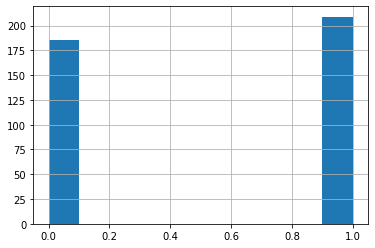

In [20]:
# Create a binary target variable. Is the total grade greater than or equal to the median or not. 
cutoff = df['G3'].median()
df['Target'] = (df['G3'] >= cutoff).astype(int)
df['Target'].hist()
df = df.drop(columns=['G1', 'G2', 'G3'])

### Encode Features

In [21]:
# Convert categorical variables to numerical
for feature in df.columns:
    if df[feature].dtype.kind not in 'iufc':
        # Column is not numerical
        df[feature] = df[feature].astype("category")
        df[feature] = df[feature].cat.codes.astype("int")

In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Target
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,0


### Feature Selection

In [24]:
X = df.drop(columns=['Target'])
y = df['Target']

In [35]:
select = SelectKBest(chi2, k=10)
X_new = select.fit_transform(X, y)
filt = select.get_support()
features = X.columns

In [37]:
# Print out the top 10 most important features
important_features = features[filt]
print(important_features)

Index(['school', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'failures', 'schoolsup',
       'goout', 'Walc', 'absences'],
      dtype='object')


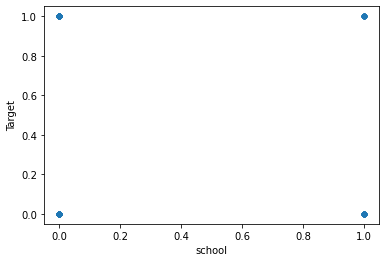

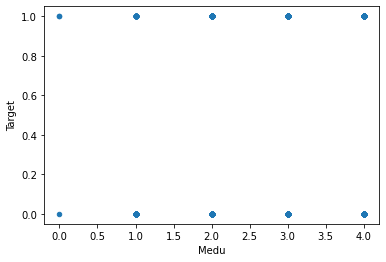

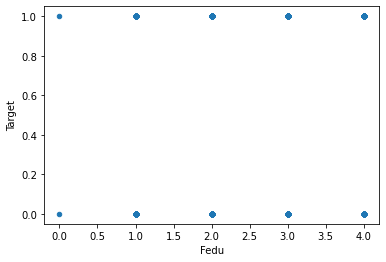

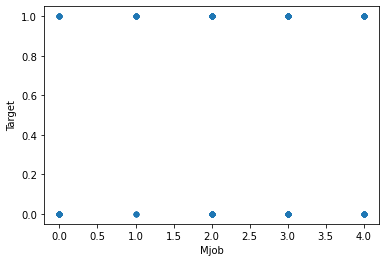

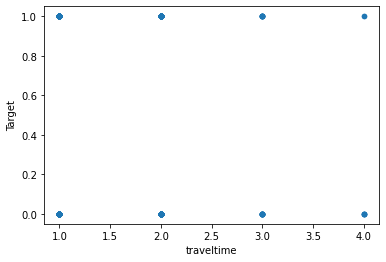

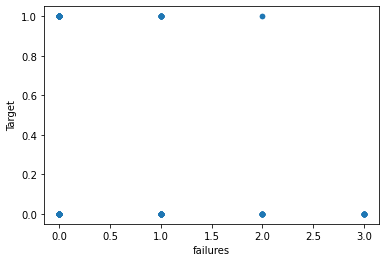

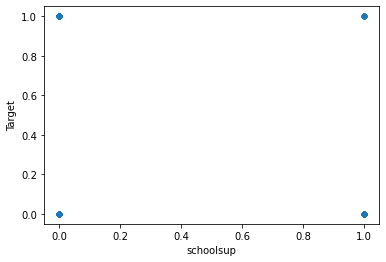

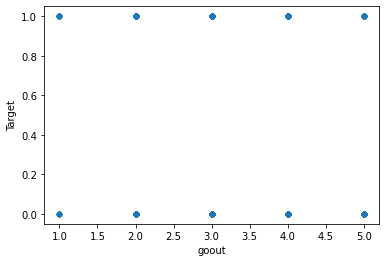

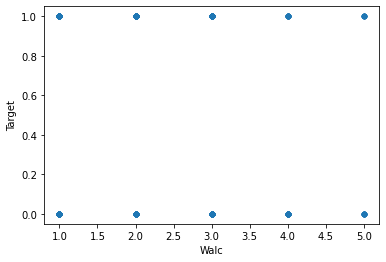

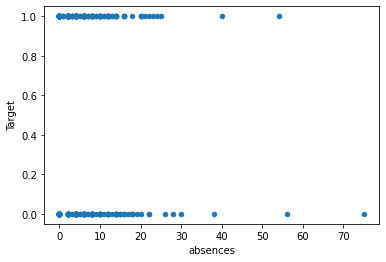

In [38]:
# Plots for importance features
for important in important_features:
    # TODO - which plot to use

In [31]:
# Compare different binary classifier models:
# - tree based
# - logistic regression
# - knn 
# - naive bayes

In [ ]:
# Show feature importance